In [57]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sn
import os

In [58]:
ROOT='./kaggle/input/dt23-test/'

def daily_percentage_return(df):
    return df.pct_change().dropna()


C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().dropna()


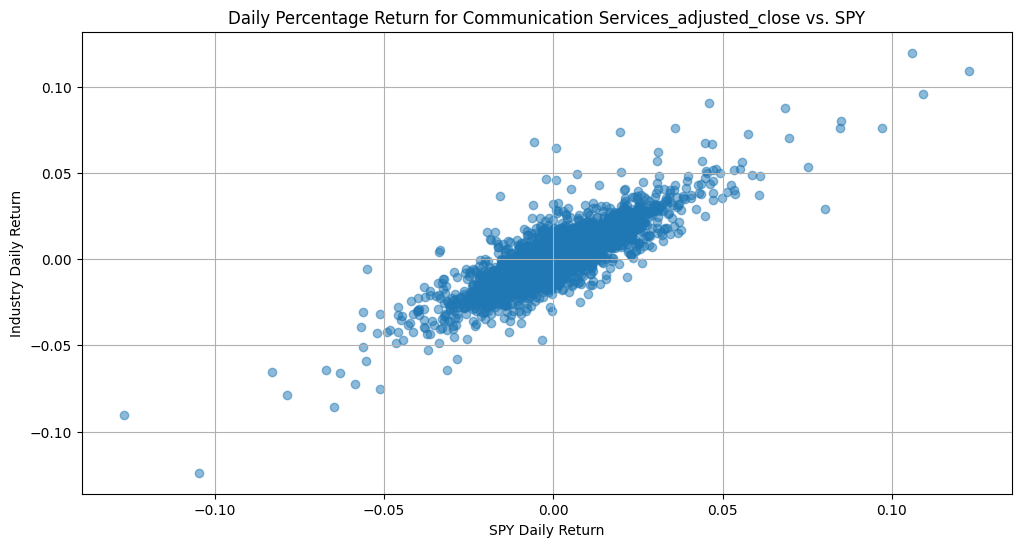

C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().dropna()


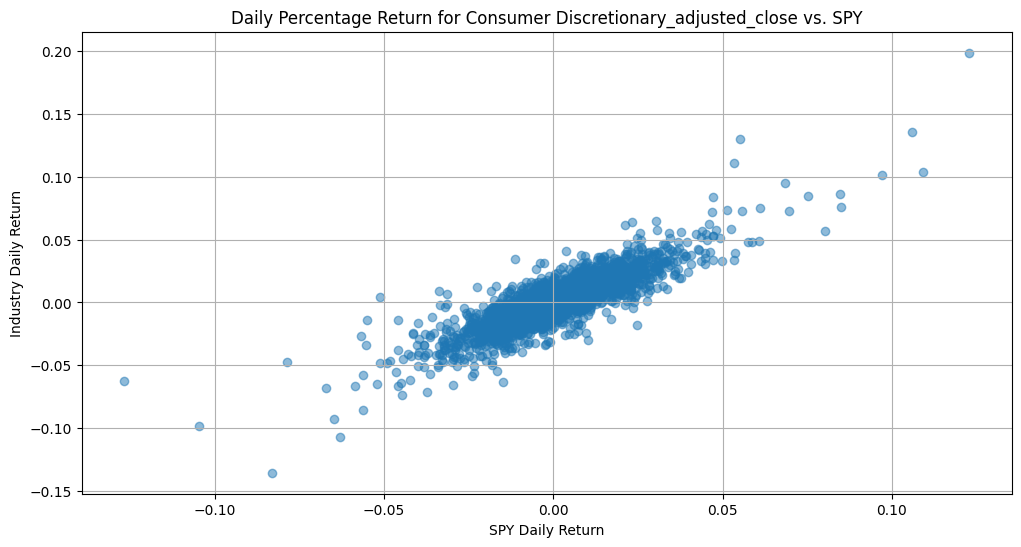

C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().dropna()


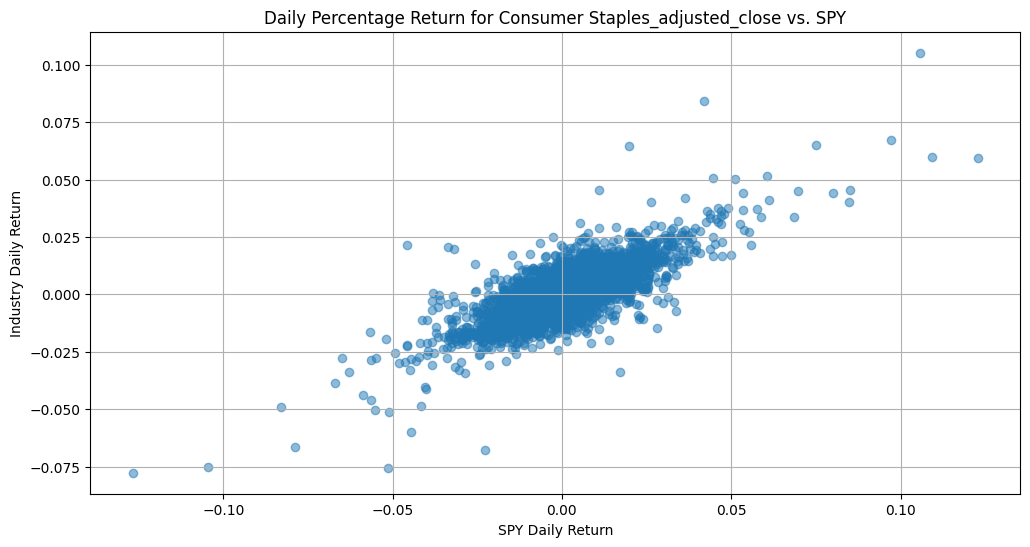

C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().dropna()


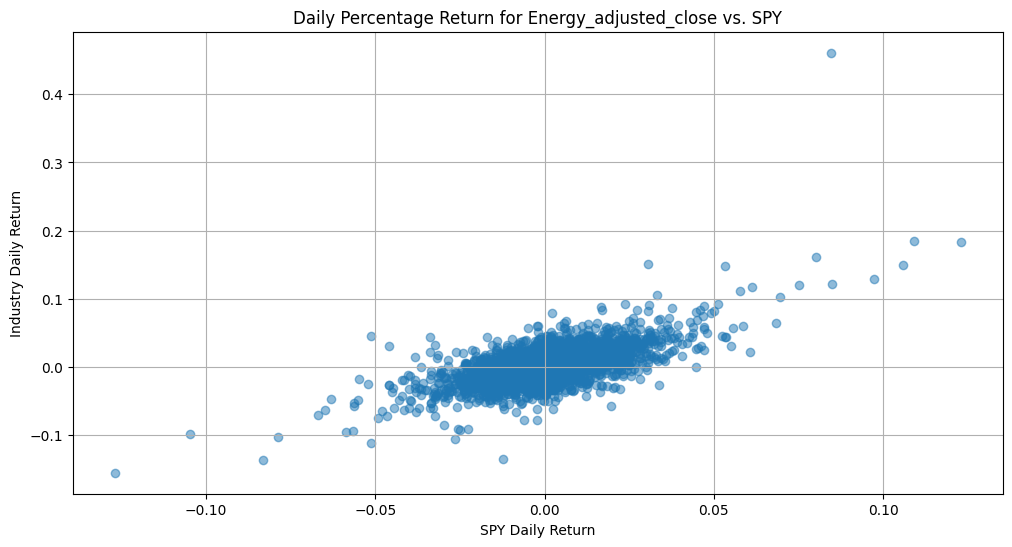

C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().dropna()


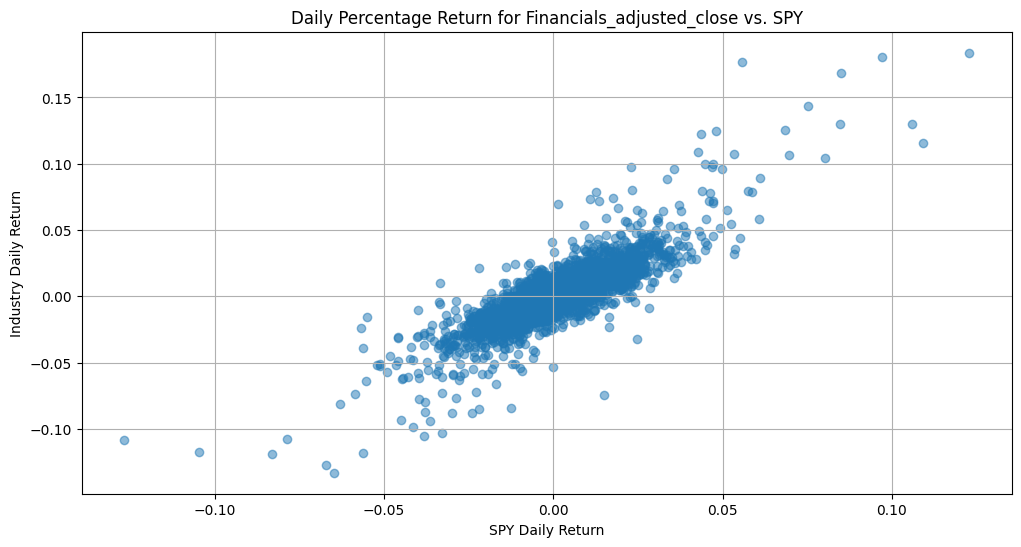

C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().dropna()


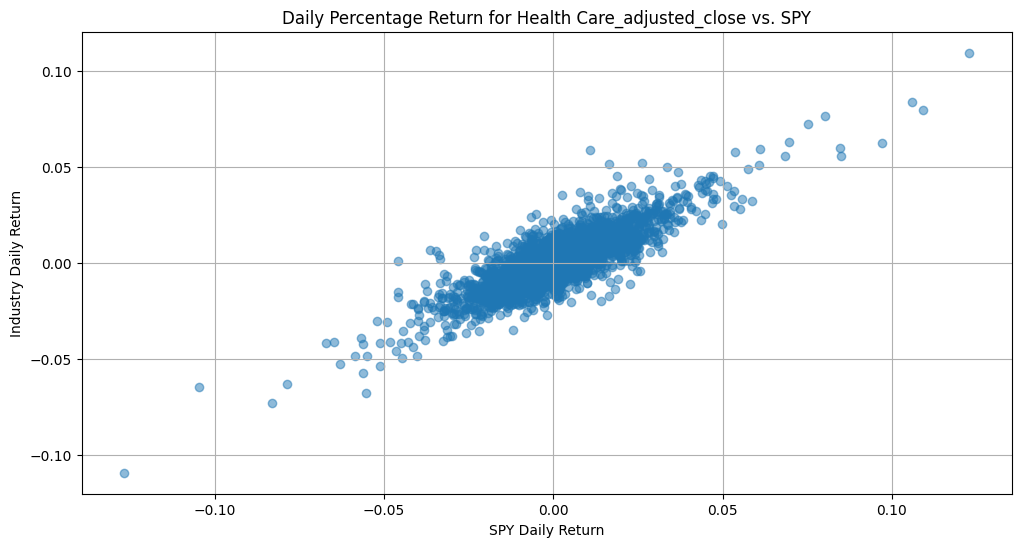

C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().dropna()


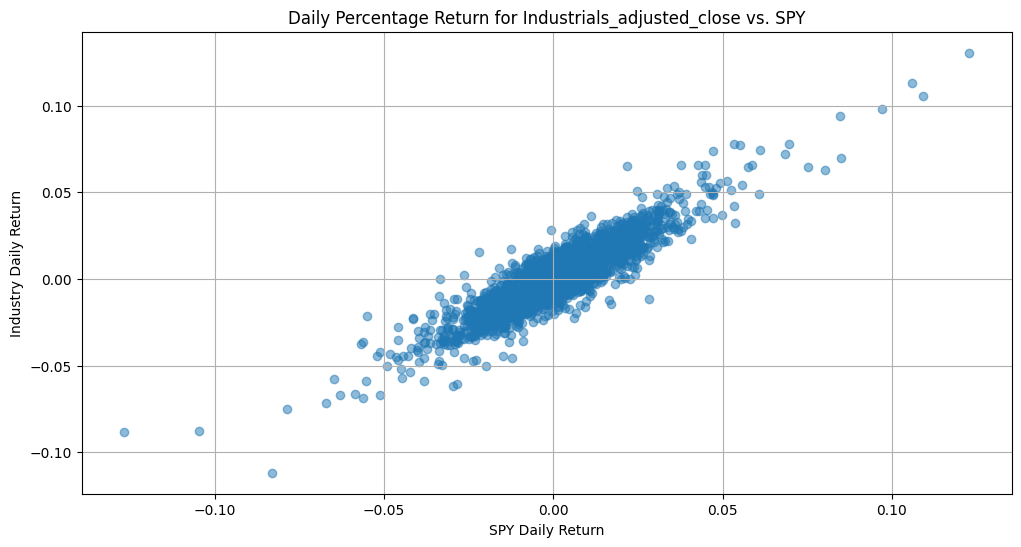

C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().dropna()


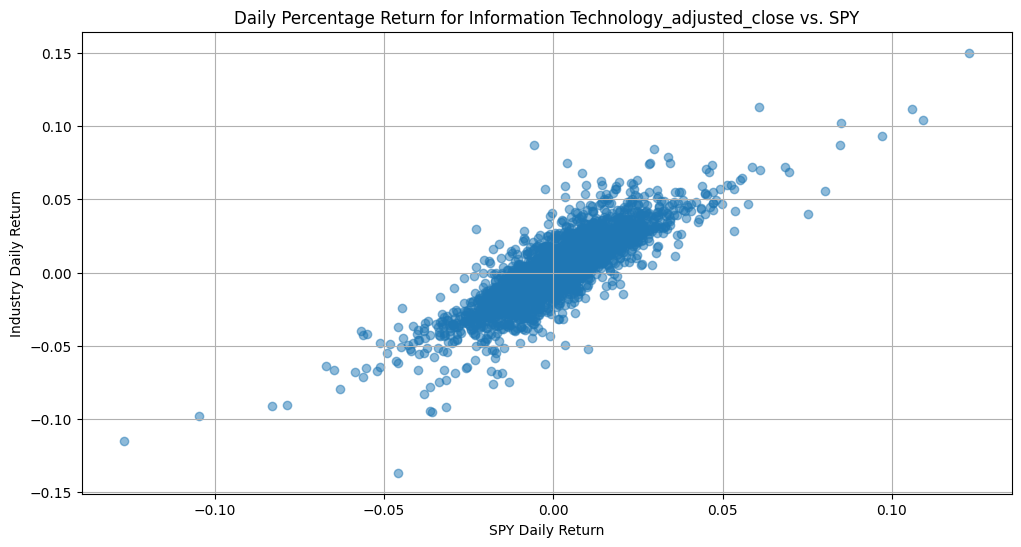

C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().dropna()


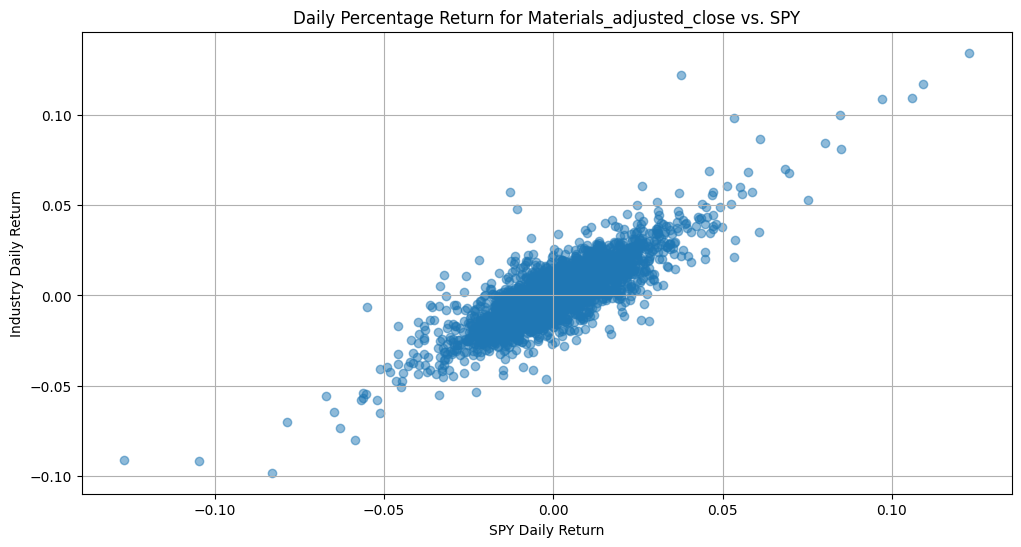

C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().dropna()


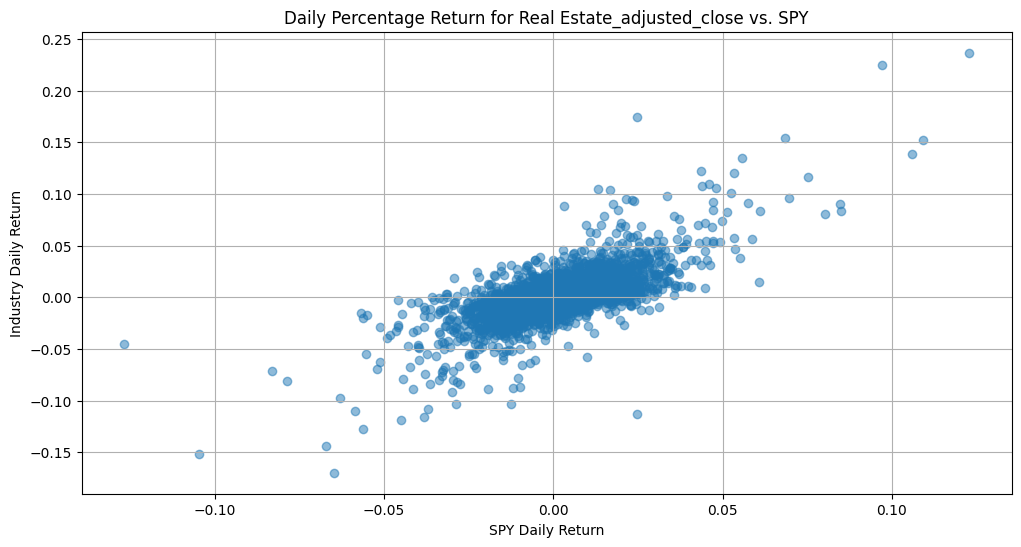

C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().dropna()


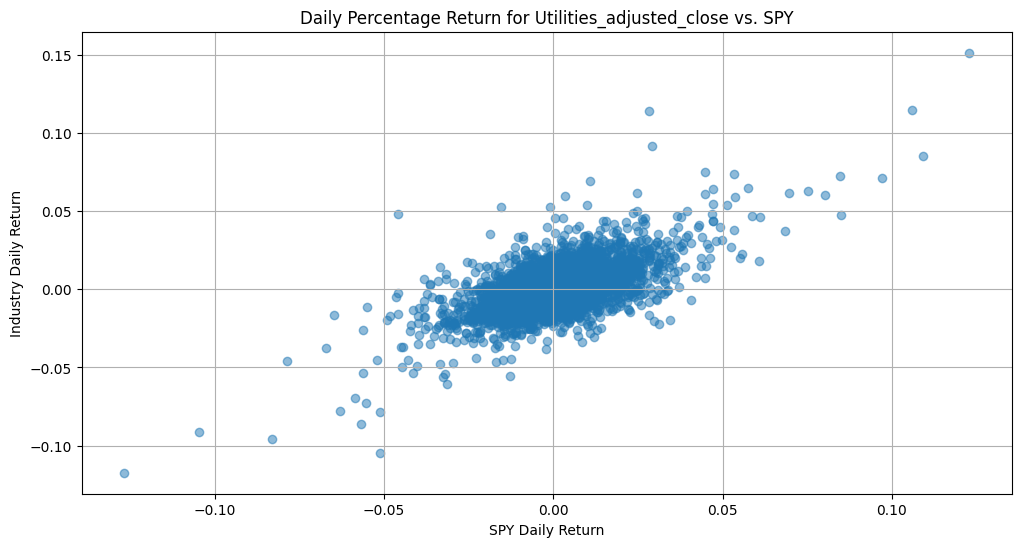

In [59]:
# Getting All Industry Returns

directory_path = ROOT + 'series/adjusted_close_per_industry'
all_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f)) and f.endswith('.csv')]

for file in all_files:
    industry_df = pd.read_csv(os.path.join(directory_path, file))
    industry_df['timestamp'] = pd.to_datetime(industry_df['timestamp'])
    industry_df.set_index('timestamp', inplace=True)
    
    # Calculate the daily percentage return for the industry and SPY
    industry_daily_return = daily_percentage_return(industry_df.drop(columns=['adjusted_close_SPY500'])).mean(axis=1)
    spy_daily_return = daily_percentage_return(industry_df['adjusted_close_SPY500'])
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(spy_daily_return, industry_daily_return, alpha=0.5)
    plt.title(f'Daily Percentage Return for {file.split(".")[0]} vs. SPY')
    plt.xlabel('SPY Daily Return')
    plt.ylabel('Industry Daily Return')
    plt.grid(True)
    plt.show()

# With this we get the average industry return for a given day vs the spy's daily return for that day
# In theory, We can now optimize for industries that are strongly positively correlated with the spy on green days and weekly correlated on red days

C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().dropna()
C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return df.pct_change().dropna()
C:\Users\chott\AppData\Local\Temp\ipykernel_4652\2240369870.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA valu

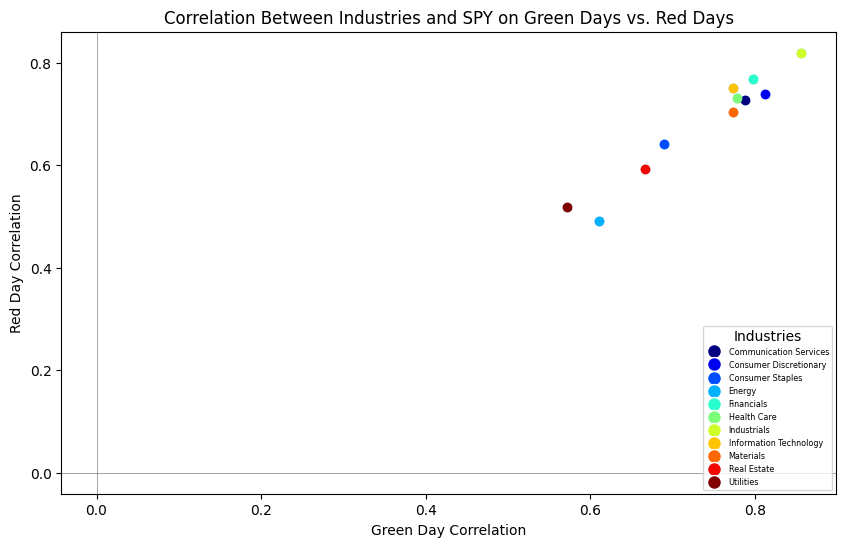

In [60]:
# Data Set Seperation
# Getting All Industry Returns

from matplotlib.lines import Line2D

industry_correlations = {}

for file in all_files:
    industry_df = pd.read_csv(os.path.join(directory_path, file))
    industry_df['timestamp'] = pd.to_datetime(industry_df['timestamp'])
    industry_df.set_index('timestamp', inplace=True)
    
    # Calculate the daily percentage return for the industry and SPY
    industry_daily_return = daily_percentage_return(industry_df.drop(columns=['adjusted_close_SPY500'])).mean(axis=1)
    spy_daily_return = daily_percentage_return(industry_df['adjusted_close_SPY500'])

    # Separate into green days and red days for SPY
    green_days = industry_daily_return[spy_daily_return > 0]
    red_days = industry_daily_return[spy_daily_return <= 0]

    # Calculate the correlation coefficients
    green_correlation = green_days.corr(spy_daily_return[spy_daily_return > 0])
    red_correlation = red_days.corr(spy_daily_return[spy_daily_return <= 0])

    # Save the correlation coefficients to the dictionary
    industry_correlations[file] = {'green_correlation': green_correlation, 'red_correlation': red_correlation}

correlation_df = pd.DataFrame.from_dict(industry_correlations, orient='index')


plt.figure(figsize=(10, 6))
plt.scatter(correlation_df['green_correlation'], correlation_df['red_correlation'], alpha=0.5)

# Add titles and labels
plt.title('Correlation Between Industries and SPY on Green Days vs. Red Days')
plt.xlabel('Green Day Correlation')
plt.ylabel('Red Day Correlation')

# Define the quadrants with vertical and horizontal lines at the origin
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)

colors = plt.cm.jet(np.linspace(0, 1, len(correlation_df)))
legend_elements = {}

# Optionally, you can annotate each point with the industry identifier if it's not too crowded
for i, txt in enumerate(correlation_df.index):
    industry_name = txt.replace('_adjusted_close.csv', '')
    color = colors[i]
    plt.scatter(correlation_df['green_correlation'].iat[i], correlation_df['red_correlation'].iat[i], color=color, label=industry_name, alpha=1)
    # Create a legend element for each industry
    legend_elements[industry_name] = Line2D([0], [0], marker='o', color='w', label=industry_name,
                                             markerfacecolor=color, markersize=10)

# Add the legend to the plot
plt.legend(handles=list(legend_elements.values()), loc='lower right', fontsize='xx-small', title="Industries")

# Optional: If the plot is too crowded, save the figure and open it in an external viewer
plt.savefig("correlation_plot.png", dpi=300)

plt.show()

In [61]:
# In theory, red days and green days should be linearly correlated. And such, we can discriminate
# against industries that have high red_day corr to green_day corr, which should represent the biggest losers during periods of economic shrinking.

from sklearn.linear_model import LinearRegression

def select_industries(correlation_df):
    # Fit the linear model
    X = correlation_df['green_correlation'].values.reshape(-1, 1)
    y = correlation_df['red_correlation'].values
    model = LinearRegression().fit(X, y)
    
    # Get the predicted y values from the model
    predicted = model.predict(X)
    
    # Calculate the residuals (actual - predicted)
    correlation_df['residuals'] = y - predicted
    
    # Add a column for the distance from the line (negative residuals are below the line)
    correlation_df['distance_from_fit'] = -correlation_df['residuals']
    
    # Select industries with the highest green_day beta that are furthest below the linear fit
    selected_industries = correlation_df[correlation_df['distance_from_fit'] > 0.01].sort_values(by=['green_correlation', 'distance_from_fit'], ascending=[False, False])
    
    return selected_industries

# Call the function with your correlation_df
selected_industries = select_industries(correlation_df)

print(selected_industries)

                                           green_correlation  red_correlation  \
Consumer Discretionary_adjusted_close.csv           0.811973         0.739079   
Materials_adjusted_close.csv                        0.772697         0.704676   
Energy_adjusted_close.csv                           0.610133         0.491901   

                                           residuals  distance_from_fit  
Consumer Discretionary_adjusted_close.csv  -0.026342           0.026342  
Materials_adjusted_close.csv               -0.015751           0.015751  
Energy_adjusted_close.csv                  -0.042295           0.042295  


In [62]:
# Company Discrimination
# Now that we have the industries we want to ride on, we should prioritize companies within those industries that follows or exceeds the industry average (perc gain)

